# Fields Details:

Date: The date of the record.

CountryRegion: The name of the country/region. 

-alpha-3code: country code for that can be used for map visualization.

Population: The population of the given country/region.

TotalConfirmedCases: Cumulative confirmed cases.

Total_Fatalities: Cumulative fatalities.

TotalRecoveredCases: Cumulative recovered cases.

NewConfirmedCases: Daily new confirmed cases.

New_Fatalities: Daily new fatalities.

NewRecoveredCases: Daily new recovered cases.

RemainingConfirmedCases: Remaining infected cases which equal to (cumulative confirmed cases - cumulative recovered cases - cumulative fatalities).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import math 
%matplotlib inline

In [11]:
df_code =pd.read_csv("wikipedia-iso-country-codes.csv")

In [3]:
df = pd.read_csv(r'Country_Level_Info.csv')
df.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0


In [4]:
df.tail()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
43611,2020-09-09,West Bank and Gaza,NaN,4569087,27919,192,18466,556,2,687,9261
43612,2020-09-09,Western Sahara,ESH,597339,10,1,8,0,0,0,1
43613,2020-09-09,Yemen,YEM,29825964,1999,576,1209,5,0,6,214
43614,2020-09-09,Zambia,ZMB,17351822,13112,300,11839,160,3,52,973
43615,2020-09-09,Zimbabwe,ZWE,14439018,7429,222,5542,41,4,65,1665


In [5]:
df.shape

(43616, 11)

In [5]:
df.isna().sum()

Date                           0
Country_Region                 0
alpha-3_code                 928
Population                     0
Total_Confirmed_Cases          0
Total_Fatalities               0
Total_Recovered_Cases          0
New_Confirmed_Cases            0
New_Fatalities                 0
New_Recovered_Cases            0
Remaining_Confirmed_Cases      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43616 entries, 0 to 43615
Data columns (total 11 columns):
Date                         43616 non-null object
Country_Region               43616 non-null object
alpha-3_code                 42688 non-null object
Population                   43616 non-null int64
Total_Confirmed_Cases        43616 non-null int64
Total_Fatalities             43616 non-null int64
Total_Recovered_Cases        43616 non-null int64
New_Confirmed_Cases          43616 non-null int64
New_Fatalities               43616 non-null int64
New_Recovered_Cases          43616 non-null int64
Remaining_Confirmed_Cases    43616 non-null int64
dtypes: int64(8), object(3)
memory usage: 3.7+ MB


In [7]:
df.describe(include='int')

,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
count,4.361600e+04,4.361600e+04,43616.000000,4.361600e+04,43616.000000,43616.000000,43616.000000,4.361600e+04
mean,4.018555e+07,4.149437e+04,1782.650105,2.336990e+04,638.842008,20.719140,430.500802,1.634182e+04
std,1.457857e+08,2.681014e+05,9952.784818,1.473482e+05,4068.070223,122.655982,3157.316711,1.384344e+05
min,8.010000e+02,0.000000e+00,0.000000,0.000000e+00,-10034.000000,-1918.000000,-16298.000000,-2.000000e+00
25%,2.245639e+06,1.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00
50%,9.511516e+06,6.870000e+02,10.000000,1.750000e+02,6.000000,0.000000,0.000000,1.930000e+02
75%,2.956375e+07,7.846000e+03,159.000000,3.001000e+03,121.000000,2.000000,43.000000,2.458000e+03
max,1.392730e+09,6.361265e+06,190859.000000,3.611632e+06,95735.000000,4143.000000,140050.000000,3.782927e+06


In [8]:
df.describe(include='object')

,Date,Country_Region,alpha-3_code
count,43616,43616,42688
unique,232,188,184
top,2020-01-23,Ecuador,HTI
freq,188,232,232


In [9]:
filtered_df = df[df['alpha-3_code'].isnull()]
filtered_df

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
48,2020-01-22,Diamond Princess,NaN,3711,0,0,0,0,0,0,0
104,2020-01-22,MS Zaandam,NaN,1829,0,0,0,0,0,0,0
157,2020-01-22,South Sudan,NaN,11193725,0,0,0,0,0,0,0
183,2020-01-22,West Bank and Gaza,NaN,4569087,0,0,0,0,0,0,0
236,2020-01-23,Diamond Princess,NaN,3711,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43423,2020-09-08,West Bank and Gaza,NaN,4569087,27363,190,17779,584,6,509,9394
43476,2020-09-09,Diamond Princess,NaN,3711,712,13,651,0,0,0,48
43532,2020-09-09,MS Zaandam,NaN,1829,9,2,0,0,0,0,7
43585,2020-09-09,South Sudan,NaN,11193725,2555,49,1290,3,0,0,1216


In [12]:
df_code.shape

(246, 5)

In [15]:
filtered_df['Country_Region'].value_counts()

Diamond Princess      232
West Bank and Gaza    232
MS Zaandam            232
South Sudan           232
Name: Country_Region, dtype: int64

In [6]:
df=df.drop(['alpha-3_code'],axis=1)

In [7]:
df.columns

Index(['Date', 'Country_Region', 'Population', 'Total_Confirmed_Cases',
       'Total_Fatalities', 'Total_Recovered_Cases', 'New_Confirmed_Cases',
       'New_Fatalities', 'New_Recovered_Cases', 'Remaining_Confirmed_Cases'],
      dtype='object')

In [8]:
df.corr()

,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
Population,1.000000,0.259290,0.217435,0.277514,0.342003,0.251084,0.310208,0.191143
Total_Confirmed_Cases,0.259290,1.000000,0.910088,0.910430,0.856601,0.611025,0.743492,0.902183
Total_Fatalities,0.217435,0.910088,1.000000,0.771829,0.762950,0.650529,0.612450,0.869114
Total_Recovered_Cases,0.277514,0.910430,0.771829,1.000000,0.811533,0.552228,0.823195,0.643320
New_Confirmed_Cases,0.342003,0.856601,0.762950,0.811533,1.000000,0.739548,0.835931,0.740312
New_Fatalities,0.251084,0.611025,0.650529,0.552228,0.739548,1.000000,0.581147,0.548797
New_Recovered_Cases,0.310208,0.743492,0.612450,0.823195,0.835931,0.581147,1.000000,0.519663
Remaining_Confirmed_Cases,0.191143,0.902183,0.869114,0.643320,0.740312,0.548797,0.519663,1.000000


In [9]:
df.groupby(['Country_Region']).mean().round(decimals=4)

,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
Country_Region,,,,,,,,
Afghanistan,37172386.0,15477.6164,469.4612,8681.0043,166.1379,6.1207,133.8276,6327.1509
Albania,2866376.0,2322.0690,69.1595,1310.5733,46.1379,1.3879,27.0862,942.3362
Algeria,42228429.0,12488.6853,599.5603,8425.0388,203.5172,6.8147,143.8750,3464.0862
Andorra,77006.0,605.6379,33.3621,462.4440,5.6078,0.2284,4.0431,109.8319
Angola,30809762.0,484.2672,21.3621,175.9914,13.3276,0.5431,5.3664,286.9138
...,...,...,...,...,...,...,...,...
West Bank and Gaza,4569087.0,4436.1250,29.3017,2320.1681,120.3405,0.8276,79.5948,2086.6552
Western Sahara,597339.0,5.7802,0.4612,4.3103,0.0431,0.0043,0.0345,1.0086
Yemen,29825964.0,644.4440,178.1293,296.9741,8.6164,2.4828,5.2112,169.3405


In [10]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')

In [11]:
df['Date'].dtype

dtype('<M8[ns]')

In [12]:
df['Date_Month'] = df['Date'].map(lambda x: x.strftime('%m'))

df['Date_Year'] = df['Date'].map(lambda x: x.strftime('%Y'))

df['Date_Date'] = df['Date'].map(lambda x: x.strftime('%m%d'))

#df

In [13]:
df['Date_Month'].dtype

dtype('O')

In [14]:
df_filtered_country=df[df['Country_Region']=='India']

#df_filtered_country#.sort_values('Total_Confirmed_Cases',ascending=False)

#df_filtered_by_month=df[df['Date_Month']== '02']

#df_filtered_month_country=df_filtered__by_month[df_filtered__by_month['Country_Region']== 'US']

#df_filtered_month_country

In [15]:
group_date_month = df_filtered_country.groupby(['Date_Month','Country_Region']).max()#.reset_index()

group_date_month

#group_date_month.get_group('Afghanistan')

#group_date_month.(lambda x: x['Country_Region'] == 'Afghanistan')

,,Date,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases,Date_Year,Date_Date
Date_Month,Country_Region,,,,,,,,,,,
01,India,2020-01-31,1352617328,1,0,0,1,0,0,1,2020,0131
02,India,2020-02-29,1352617328,3,0,3,1,0,3,3,2020,0229
03,India,2020-03-31,1352617328,1397,35,123,227,8,28,1239,2020,0331
04,India,2020-04-30,1352617328,34863,1154,9068,1893,75,702,24641,2020,0430
05,India,2020-05-31,1352617328,190609,5408,91852,8782,269,11707,93349,2020,0531
06,India,2020-06-30,1352617328,585481,17400,347912,19906,2003,13940,220169,2020,0630
07,India,2020-07-31,1352617328,1695988,36511,1094374,61242,1129,39026,565103,2020,0731
08,India,2020-08-31,1352617328,3691166,65288,2839882,85687,1115,66550,785996,2020,0831
09,India,2020-09-09,1352617328,4465863,75062,3471783,95735,1172,74894,919018,2020,0909


In [16]:
# for whole dataset

group_date_month = df.groupby(['Date_Month','Country_Region']).max()#.reset_index()

#group_date_month.get_group('Afghanistan')

#group_date_month.apply(lambda x: x['Country_Region'] == 'Afghanistan', axis=1)

group_date_month

Date  Population  Total_Confirmed_Cases  \
Date_Month Country_Region                                                     
01         Afghanistan        2020-01-31    37172386                      0   
           Albania            2020-01-31     2866376                      0   
           Algeria            2020-01-31    42228429                      0   
           Andorra            2020-01-31       77006                      0   
           Angola             2020-01-31    30809762                      0   
...                                  ...         ...                    ...   
09         West Bank and Gaza 2020-09-09     4569087                  27919   
           Western Sahara     2020-09-09      597339                     10   
           Yemen              2020-09-09    29825964                   1999   
           Zambia             2020-09-09    17351822                  13112   
           Zimbabwe           2020-09-09    14439018                   7429   

                               Total_Fatalities  Total_Recovered_Cases  \
Date_Month Country_Region                                                
01         Afghanistan                        0                      0   
           Albania                            0                      0   
           Algeria                            0                      0   
           Andorra                            0                      0   
           Angola                             0                      0   
...                                         ...                    ...   
09         West Bank and Gaza               192                  18466   
           Western Sahara                     1                      8   
           Yemen                            576                   1209   
           Zambia                           300                  11839   
           Zimbabwe                         222                   5542   

                               New_Confirmed_Cases  New_Fatalities  \
Date_Month Country_Region                                            
01         Afghanistan                           0               0   
           Albania                               0               0   
           Algeria                               0               0   
           Andorra                               0               0   
           Angola                                0               0   
...                                            ...             ...   
09         West Bank and Gaza                  671               7   
           Western Sahara                        0               0   
           Yemen                                14               4   
           Zambia                              284               3   
           Zimbabwe                            461               8   

                               New_Recovered_Cases  Remaining_Confirmed_Cases  \
Date_Month Country_Region                                                       
01         Afghanistan                           0                          0   
           Albania                               0                          0   
           Algeria                               0                          0   
           Andorra                               0                          0   
           Angola                                0                          0   
...                                            ...                        ...   
09         West Bank and Gaza                  687                       9394   
           Western Sahara                        0                          1   
           Yemen                                29                        232   
           Zambia                               96                        973   
           Zimbabwe                            110                       1693   

                              Date_Year Date_Date  
Date_Month Country_Region   

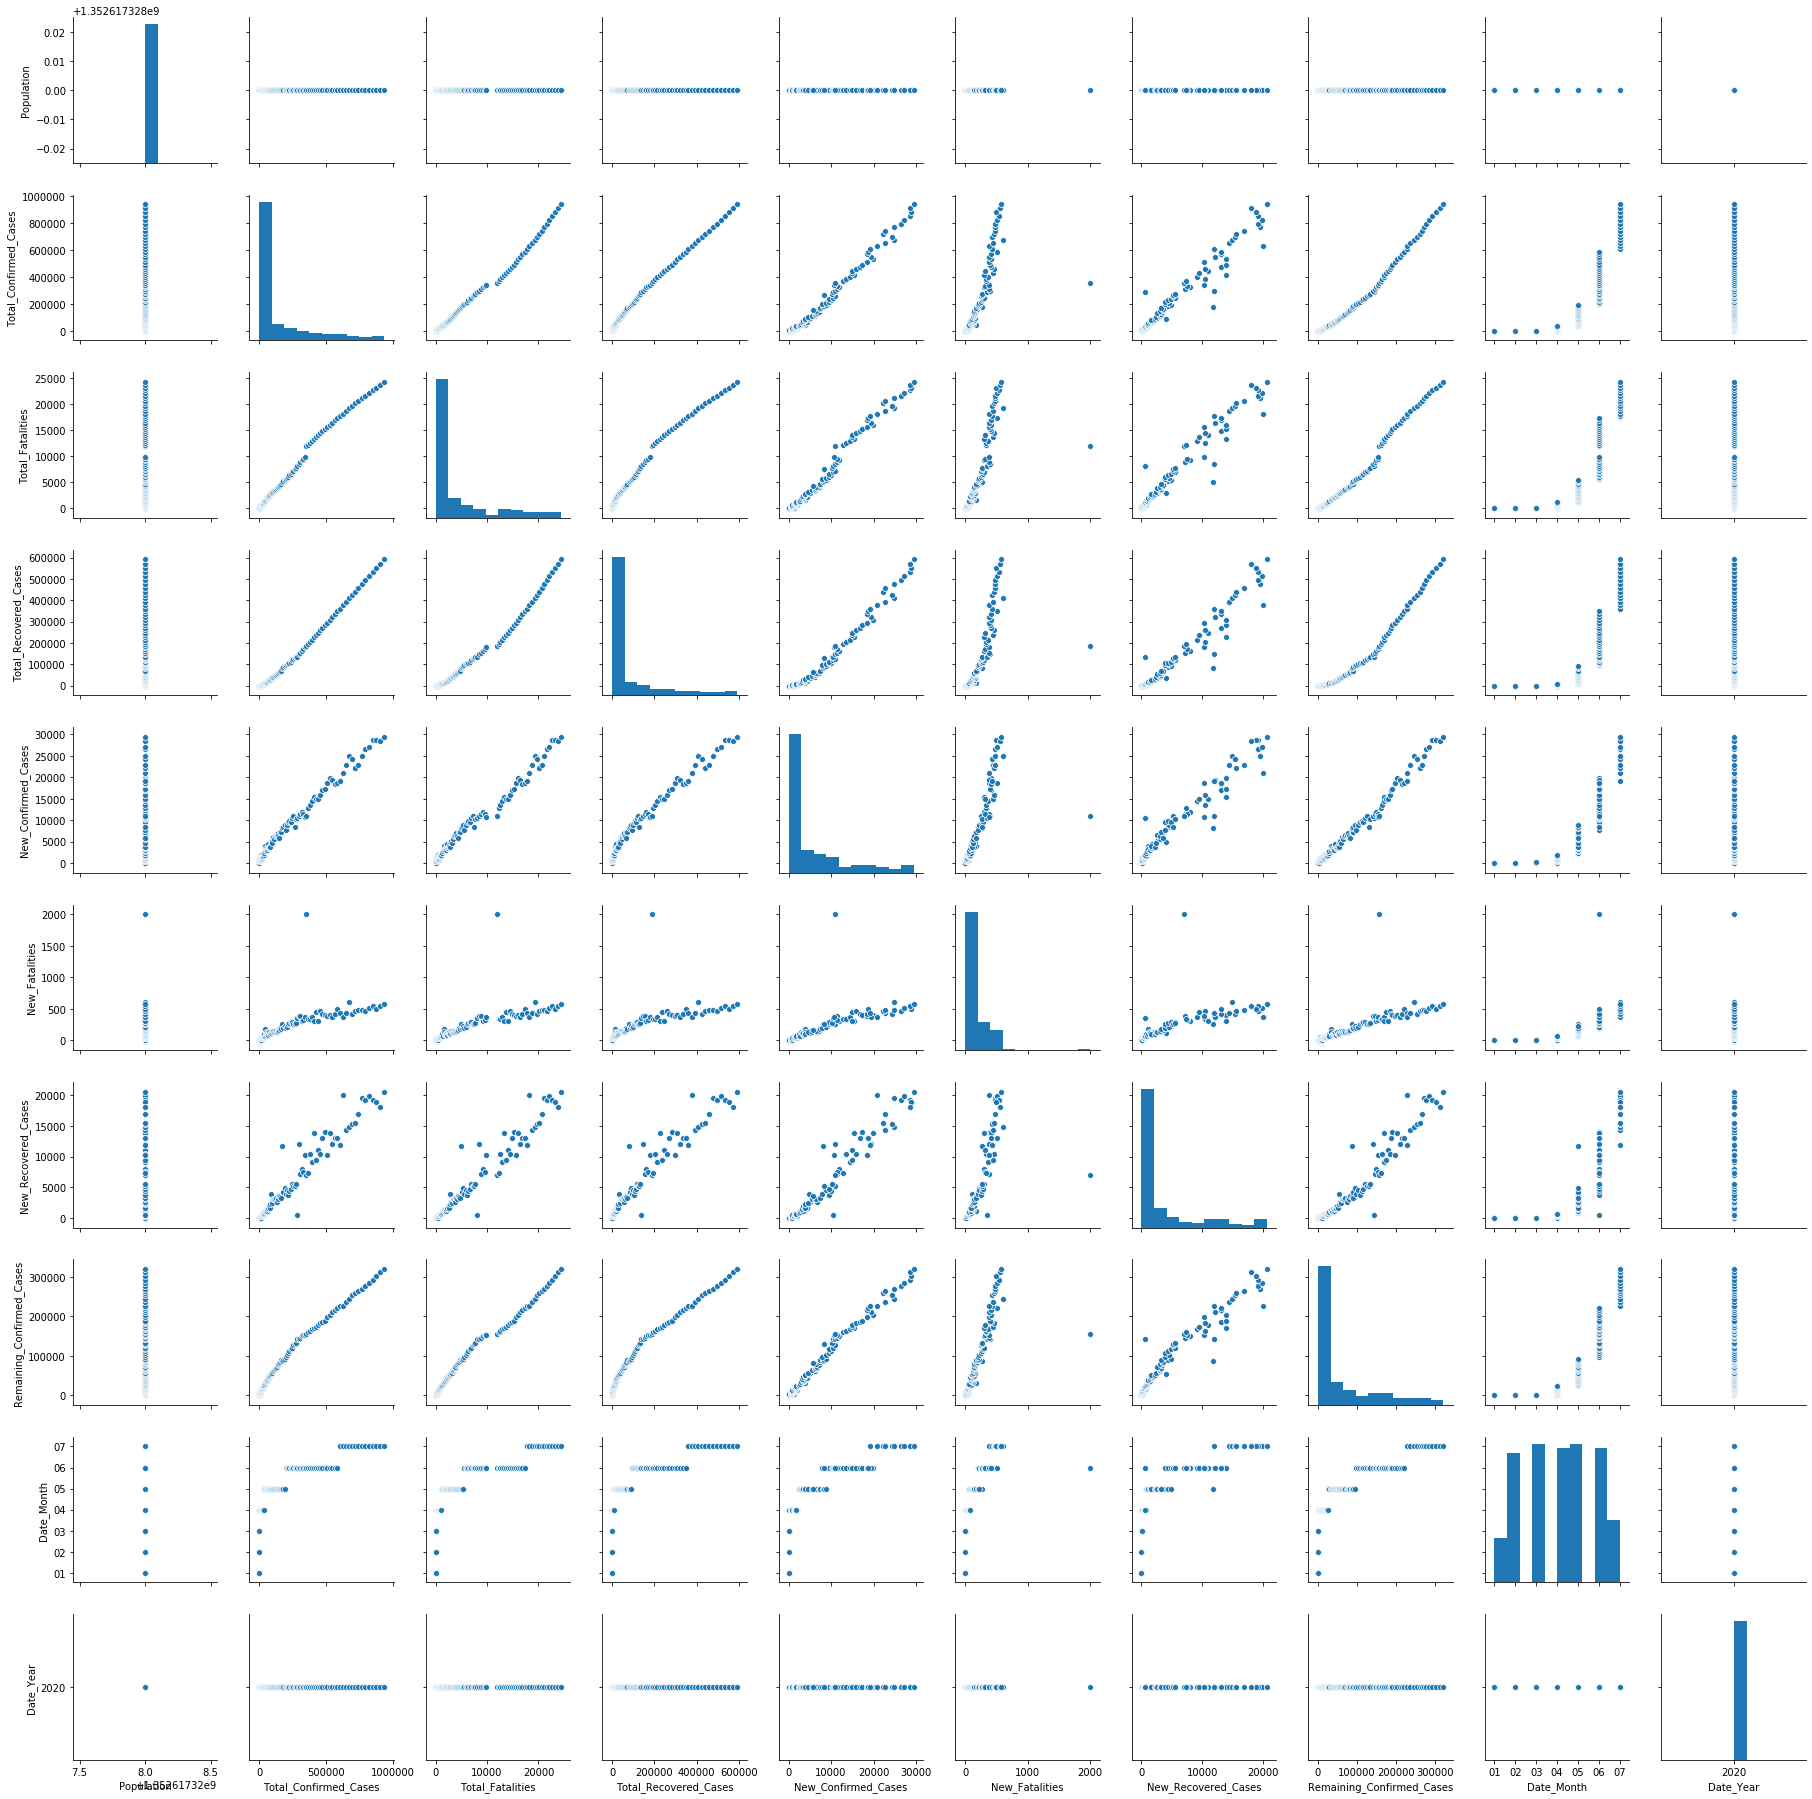

In [250]:
#ax = sns.pairplot(df)  # for all the columns

ax = sns.pairplot(df[df['Country_Region']=='India']) # Comparing for one Country


In [26]:
df.shape

(32900, 12)

# Feature Engineering

In [23]:
#Create sorted data table for Countries by Total confirmed Cases

sorted_data=df.groupby('Country_Region').max().reset_index()

sorted_data=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

sorted_data = sorted_data.head(20)

sorted_data

,Country_Region,Date,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases,Date_Month,Date_Year,Date_Date
174,US,2020-09-09,327200000,6361265,190859,2387479,77255,2609,103921,3782927,09,2020,0909
79,India,2020-09-09,1352617328,4465863,75062,3471783,95735,2003,74894,919018,09,2020,0909
23,Brazil,2020-09-09,209469333,4197889,128539,3611632,69074,1595,140050,598313,09,2020,0909
140,Russia,2020-09-09,144478050,1037526,18080,854069,11656,232,12375,245382,09,2020,0909
134,Peru,2020-09-09,31989256,696190,30123,536959,21358,4143,18627,168092,09,2020,0909
37,Colombia,2020-09-09,49648685,686851,22053,552885,15318,442,23868,169326,09,2020,0909
113,Mexico,2020-09-09,126190788,647321,69049,538514,9556,1092,10915,53350,09,2020,0909
156,South Africa,2020-09-09,57779622,642431,15168,569935,13944,572,24117,173590,09,2020,0909
158,Spain,2020-09-09,46723749,543379,29628,150376,26560,1179,6399,363375,09,2020,0909
6,Argentina,2020-09-09,44494502,512293,10658,382490,12259,381,73147,140862,09,2020,0909


### Which countries has highest number of COVID cases in the world?

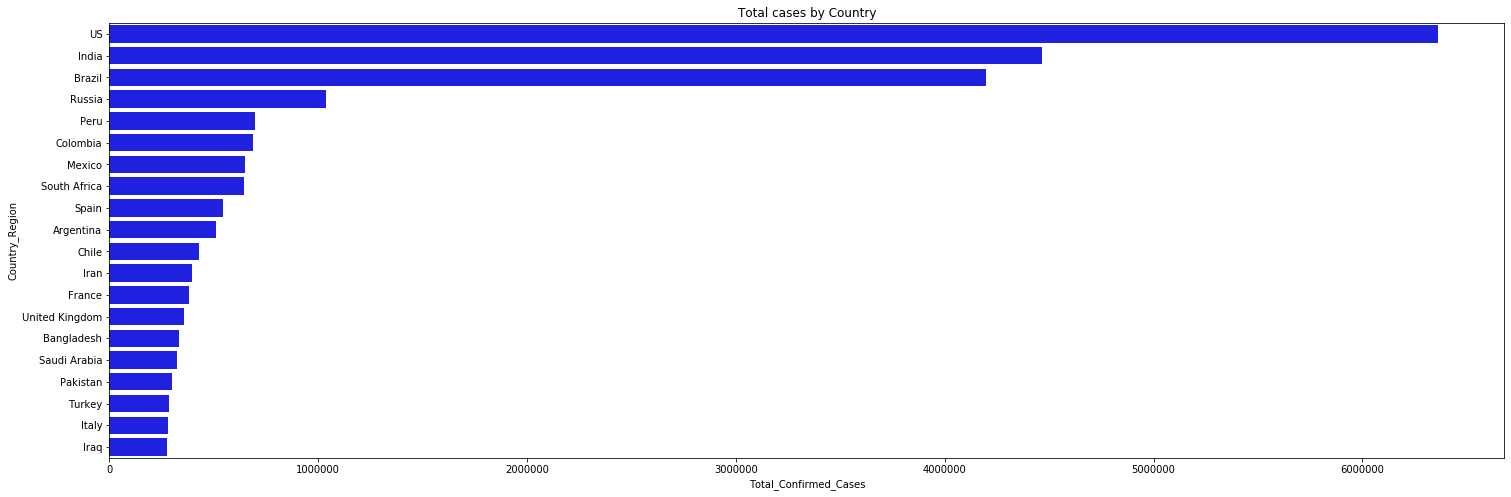

In [24]:
# Create a plot

plt.figure(figsize=(25,8))

# Add title
plt.title("Total cases by Country")

#grouped_data=df.groupby('Country_Region').sum().reset_index()

#grouped_data=grouped_data.sort_values('Total_Confirmed_Cases', ascending=False)
#grouped_data
#y_pos = np.arange(len(bars))

g = sns.barplot(x="Total_Confirmed_Cases", y="Country_Region", data=sorted_data,
            color="b",label="Total")
           
    
#label="Total", aspect=.7,hue = "Country_Region",orient="v" , #errcolor='.26'
#sns.barplot(x = grouped_data['Total_Confirmed_Cases'], y=grouped_data)
#df['Total_Confirmed_Cases'].sum()

## What percentage is distrubution of COVID cases around the world?

In [94]:
sorted_data1=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

fig = px.sunburst(
    data_frame = sorted_data1,
    path = ['Country_Region', 'Total_Confirmed_Cases', 'Total_Recovered_Cases'],
    values = 'Total_Confirmed_Cases',
    hover_name= 'Country_Region',
    #color = "Country_Region",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth = -1,
    branchvalues='remainder'
)

fig.update_traces(textinfo='label+percent root')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()

## How is Italy doing after containing the spread of virus?

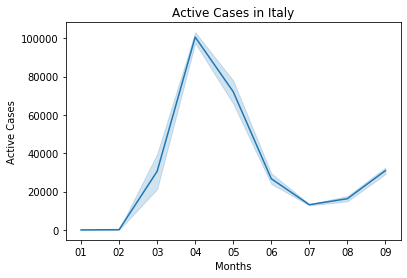

In [103]:
#ax = sns.scatterplot(x=df['date_month'], y=df['Total_Confirmed_Cases'], data=df)

temp =df[df['Country_Region']=='Italy']

plt.title("Active Cases in Italy")

ax = sns.lineplot(x=temp.Date_Month, y=temp.Remaining_Confirmed_Cases, data=temp)

ax.set(xlabel='Months', ylabel='Active Cases')

plt.show()

In [104]:
total = df.groupby('Date')['Total_Confirmed_Cases', 'Total_Fatalities', 
                           'Total_Recovered_Cases', 'Remaining_Confirmed_Cases'].sum().reset_index()

total = total[total['Date'] == max(total['Date'])].reset_index(drop=True)

total

#Acive cases(remaining_Confirm_cases) = Total cases - Total Death - Total Recovery

,Date,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-09-09,27863733,903686,18776723,8183324


## Show the trend of Total Number of Cases worldwide by each day

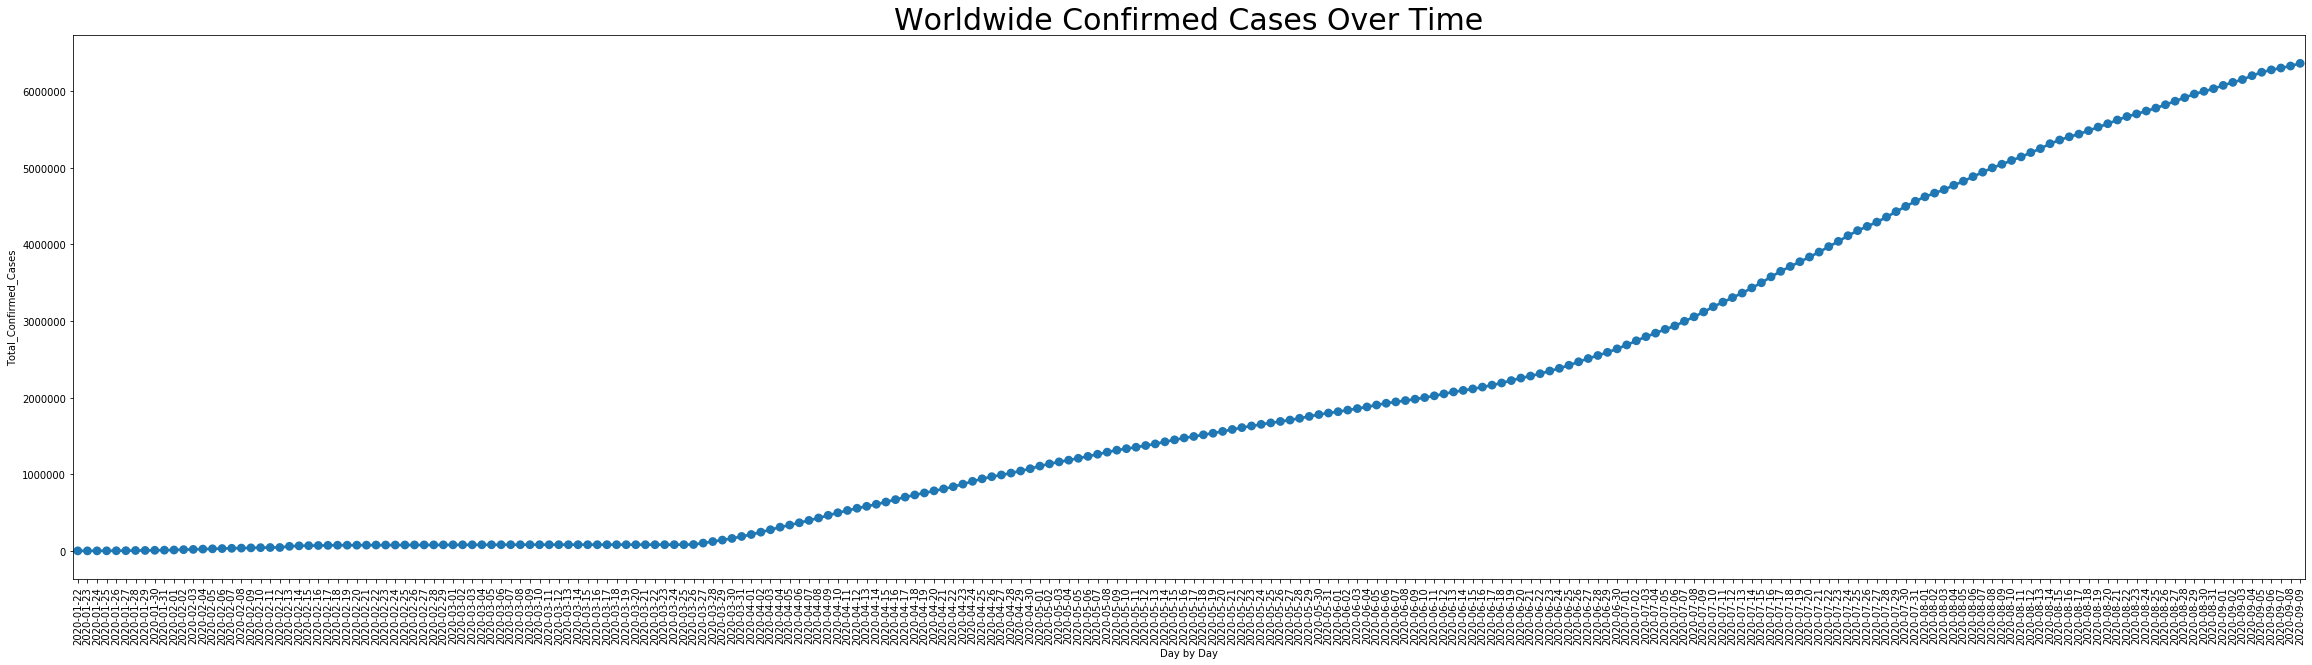

In [116]:
plt.figure(figsize= (40,10))

plt.xticks(rotation = 90 ,fontsize = 10)

plt.yticks(fontsize = 10)

#plt.xlabel('Day by Day',fontsize = 30)

#plt.ylabel('Total_Confirmed_Cases',fontsize = 30)

plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)

total_cases = df.groupby('Date')['Date', 'Total_Confirmed_Cases'].max()#.reset_index()

#total_cases['Date'] = pd.to_datetime(total_cases['Date'])


ax = sns.pointplot( x = total_cases.Date.dt.date ,y = total_cases.Total_Confirmed_Cases )#, color = 'r')

ax.set(xlabel='Day by Day', ylabel='Total_Confirmed_Cases')
plt.show()

## Which country has most Active COVID cases?

In [29]:

sorted_data_active = sorted_data.sort_values('Remaining_Confirmed_Cases', ascending=False)

sorted_data_active = sorted_data_active.head(35)

#sorted_data_active

In [30]:
fig = px.bar(sorted_data_active, x='Country_Region', y='Remaining_Confirmed_Cases', 
             text='Remaining_Confirmed_Cases', title = 'Most Active Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')#, yaxis=dict(title='USD (millions)')

fig.show()
#py.offline.iplot(fig)

## Which Country has most number of deaths from COVID?

In [31]:
sorted_data_deaths=sorted_data.sort_values('Total_Fatalities', ascending=False)

sorted_data_death = sorted_data_deaths.head(35)

#sorted_data_death

In [32]:
fig = px.bar(sorted_data_death, x='Country_Region', y='Total_Fatalities', 
             text='Total_Fatalities', title = 'Most Death Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

## Compare Confirmed Cases vs Total Recovered vs Total Deaths for Top 30 countries

In [33]:
total_new_cases = df.groupby('Country_Region')['Country_Region', 
                                               'Total_Recovered_Cases', 'Total_Confirmed_Cases','Total_Fatalities'].max()#.reset_index()
total_new_cases=total_new_cases.sort_values('Total_Confirmed_Cases', ascending = False)
total_new_cases=total_new_cases.head(35)
#total_new_cases

In [42]:
fig = go.Figure()

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Confirmed_Cases,
                name='Confirmed',
                marker_color='rgb(55, 83, 109)',
                #hovertemplate = 'Confirmed:%{y:.2f}',
                ))
fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Recovered_Cases,
                name='Recovered',
                marker_color='rgb(26, 118, 255)'
                ))

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Fatalities,
                name='Deaths',
                marker_color='rgb(200, 20, 25)'
                     
                ))

fig.update_layout(
    title='Total Cases vs. Total Recovered',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='COVID-19 Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

## Compare Rate of Recovery vs Rate of Death for each Country

In [114]:
temp = df.groupby('Country_Region')['Country_Region', 'Total_Fatalities', 'Total_Recovered_Cases', 
                                    'Total_Confirmed_Cases'].max()

temp['Rate_of_Deaths'] = round(temp['Total_Fatalities']/temp['Total_Confirmed_Cases'], 3)*100
temp['Rate_of_Recovery'] = round(temp['Total_Recovered_Cases']/temp['Total_Confirmed_Cases'], 3)*100

temp = temp.sort_values('Total_Confirmed_Cases', ascending=False)

temp = temp.head(35)

#temp

In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp.Country_Region,
                         y=temp.Rate_of_Recovery,
                         mode='lines',
                         name='Recovery Rate',
                         marker_color='rgb(0, 20, 20)'))

fig.add_trace(go.Scatter(x=total_new_cases.Country_Region,
                     y=temp.Rate_of_Deaths,
                     mode='lines',
                     name='Death Rate',
                     marker_color='rgb(255, 0, 0)' ))

#data = [trace1, trace2]
fig.update_layout(
    title='Deaths vs Recovery based for the Countries having highest number of Cases',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Percentage',
        zeroline = True,
        showline = True,
        titlefont_size=16,
        tickfont_size=14))
              
#fig = dict(data = data, layout = layo`aaut)

#fig.show()